In [ ]:
from keras.datasets import mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
#DNN Model
((trainX, trainY), (testX, testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))


trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0


lb = LabelBinarizer()
trainYnn = lb.fit_transform(trainY)
testYnn = lb.transform(testY)


model = kb.Sequential([
    kb.layers.Input(shape=[784]),
    kb.layers.Dense(200, activation="relu"),
    kb.layers.Dense(150, activation="relu"),
    kb.layers.Dense(100, activation="relu"),
    kb.layers.Dense(50, activation="relu"),
    kb.layers.Dense(25, activation="relu"),
    kb.layers.Dense(10, activation="softmax")
])


model.compile(
    loss="categorical_crossentropy",
    optimizer=kb.optimizers.SGD(0.01),
    metrics=["accuracy"]
)


history = model.fit(
    trainX,
    trainYnn,
    epochs=100,
    validation_data=(testX, testYnn)
)


train_accuracy = model.evaluate(trainX, trainYnn)[1]
test_accuracy = model.evaluate(testX, testYnn)[1]

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/100
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7323 - accuracy: 0.7872 - val_loss: 0.2726 - val_accuracy: 0.9164
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2231 - accuracy: 0.9341 - val_loss: 0.1721 - val_accuracy: 0.9497
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1574 - accuracy: 0.9541 - val_loss: 0.1382 - val_accuracy: 0.9594
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1240 - accuracy: 0.9627 - val_loss: 0.1249 - val_accuracy: 0.9603
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1019 - accuracy: 0.9694 - val_loss: 0.1087 - val_accuracy: 0.9676
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0862 - accuracy: 0.9739 - val_loss: 0.0938 - val_accuracy: 0.9703
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/

Logistic Regression Train and Test Accuracy

In [ ]:
#log regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipeline = Pipeline([
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

#fit model
logistic_pipeline.fit(trainX, trainY)

#evaluation predictions
train_preds = logistic_pipeline.predict(trainX)
test_preds = logistic_pipeline.predict(testX)

#calculate the accuracy
train_accuracy = accuracy_score(trainY, train_preds)
test_accuracy = accuracy_score(testY, test_preds)

print("Logistic Regression Train Accuracy:", train_accuracy)
print("Logistic Regression Test Accuracy:", test_accuracy)


Logistic Regression Train Accuracy: 0.9392833333333334
Logistic Regression Test Accuracy: 0.9256


plot the accuracy and loss for both the training and test sets over the 100 epochs

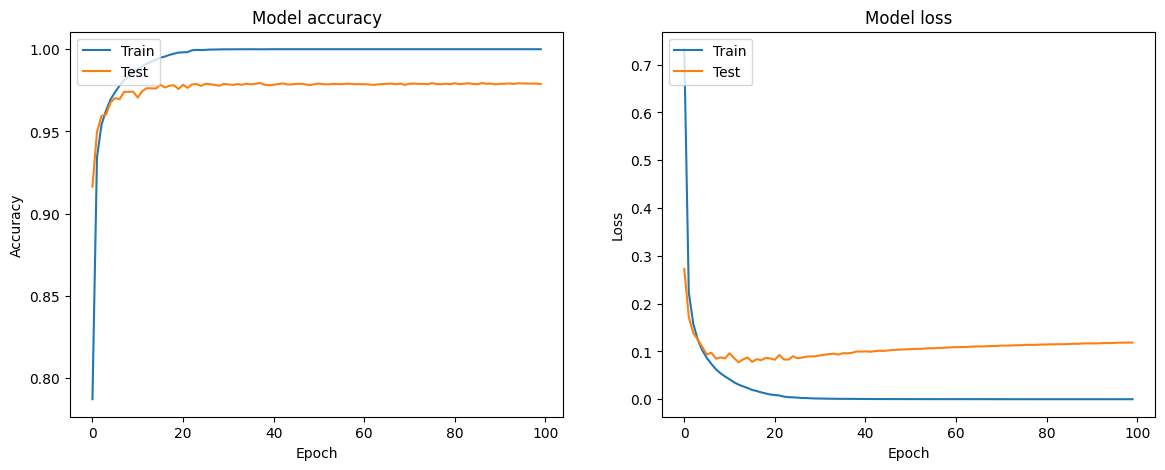

In [ ]:
#plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

#training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
